In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils

In [2]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape}  레이블: {y_train_full.shape}")
print(f"학습용 데이터: {x_train.shape}  레이블: {y_train.shape}")
print(f"검증용 데이터: {x_val.shape}  레이블: {y_val.shape}")
print(f"테스트용 데이터: {x_test.shape}  레이블: {y_test.shape}")

11501568/11490434 [==============================] - 0s 0us/step
전체 학습 데이터: (60000, 28, 28)  레이블: (60000,)
학습용 데이터: (42000, 28, 28)  레이블: (42000,)
검증용 데이터: (18000, 28, 28)  레이블: (18000,)
테스트용 데이터: (10000, 28, 28)  레이블: (10000,)


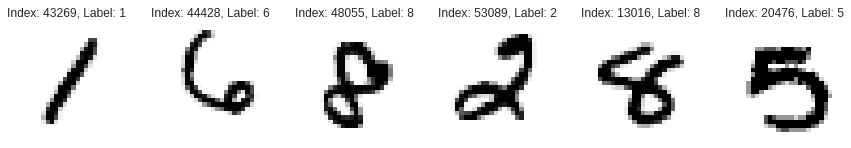

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

num_sample = 6
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_idxs):
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.axis('off')
  plt.title(f'Index: {idx}, Label: {label}')
  plt.imshow(img)

In [4]:
print(y_train[0])

4


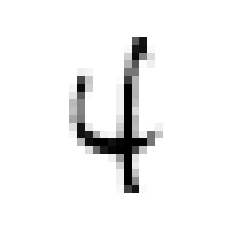

In [5]:
img = x_train[0, :]
plt.axis('off')
plt.imshow(img)

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 184 236
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 235 240
   11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  73 244 144
   59   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 186   6
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33  21   0   0   0   0 15

### 데이터 전처리
- 0 ~ 1 사이 범위로 스케일링
- one-hot encoding
    - keras.utils.to_categorical(y_train)

In [8]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

print(y_train[0])
print(y_val[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## 모델 구성


In [9]:
model = models.Sequential()
model.add(keras.Input(shape=(28, 28), name='input'))
model.add(layers.Flatten(input_shape=[28, 28], name='flatten'))
model.add(layers.Dense(100, activation='relu', name='dense1'))
model.add(layers.Dense(64, activation='relu', name='dense2'))
model.add(layers.Dense(32, activation='relu', name='dense3'))
model.add(layers.Dense(10, activation='softmax', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


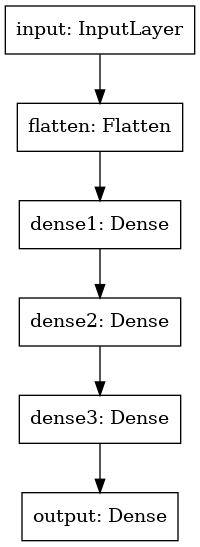

In [10]:
utils.plot_model(model)

In [12]:
### input shape까지 보고 싶으면
- show_shapes = True

SyntaxError: cannot assign to operator (155973466.py, line 2)

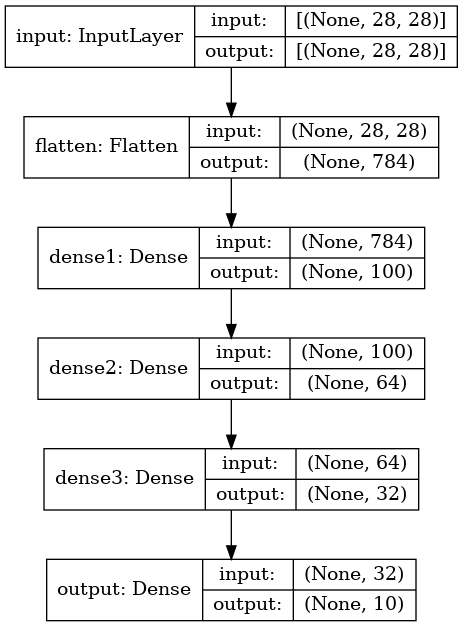

In [11]:
utils.plot_model(model, show_shapes=True)

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 4s 6ms/step - loss: 1.6579 - accuracy: 0.5354 - val_loss: 0.9481 - val_accuracy: 0.7576
Epoch 2/50
329/329 [==============================] - 1s 4ms/step - loss: 0.6843 - accuracy: 0.8186 - val_loss: 0.5474 - val_accuracy: 0.8447
Epoch 3/50
329/329 [==============================] - 1s 4ms/step - loss: 0.4667 - accuracy: 0.8707 - val_loss: 0.4394 - val_accuracy: 0.8701
Epoch 4/50
329/329 [==============================] - 2s 5ms/step - loss: 0.3898 - accuracy: 0.8905 - val_loss: 0.3932 - val_accuracy: 0.8828
Epoch 5/50
329/329 [==============================] - 2s 5ms/step - loss: 0.3486 - accuracy: 0.9020 - val_loss: 0.3364 - val_accuracy: 0.9021
Epoch 6/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3206 - accuracy: 0.9104 - val_loss: 0.3186 - val_accuracy: 0.9061
Epoch 7/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2997 - accuracy: 0.9151 - val_loss: 0.2955 - val_accuracy: 0.9147
Epoch 

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

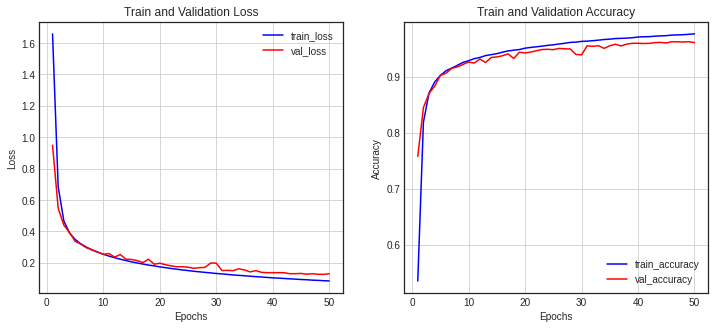

In [16]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1243 - accuracy: 0.9637


[0.12426954507827759, 0.963699996471405]

In [18]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)
print(pred_ys[0])

(10000, 10)
[5.0607940e-07 2.6096302e-06 1.6822964e-04 4.4405003e-04 3.8481965e-10
 3.0008168e-06 2.1968045e-11 9.9937004e-01 8.4814849e-07 1.0671581e-05]


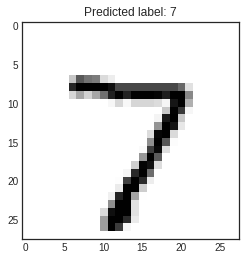

In [20]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.title(f'Predicted label: {arg_pred_y[0]}')
plt.imshow(x_test[0])
plt.show()

In [21]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.95      0.98      0.96       982
           5       0.97      0.95      0.96       892
           6       0.96      0.97      0.97       958
           7       0.94      0.97      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.98      0.91      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



## 5-3. 모델의 저장과 로드

In [22]:
model.save('mnist_model.h5')

In [23]:
loaded_model = models.load_model('mnist_model.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [24]:
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)
print(pred_ys2[0])

(10000, 10)
[5.0607940e-07 2.6096302e-06 1.6822964e-04 4.4405003e-04 3.8481965e-10
 3.0008168e-06 2.1968045e-11 9.9937004e-01 8.4814849e-07 1.0671581e-05]


7


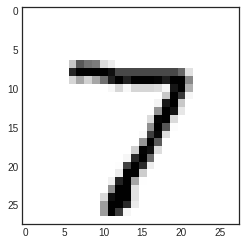

In [27]:
#예측값 시각화하기
arg_pred_y2 = np.argmax(pred_ys, axis = -1)

idx = 0
print(arg_pred_y2[idx])

#matlotlib를 이용해서 시각화하기
plt.imshow(x_test[idx])
plt.show()

In [28]:
# 위에서 학습시킨 model의 구조를 json 형식으로 model_json에 저장합니다.
model_json = model.to_json()

# json으로 저장한 모델을 읽어옵니다.
loaded_model = keras.models.model_from_json(model_json)

predictions = loaded_model.predict(x_test)
print(predictions.shape)
print(predictions[0])

(10000, 10)
[0.09996795 0.133385   0.1144546  0.10243185 0.08771397 0.07903438
 0.09738405 0.09188966 0.10761201 0.0861266 ]


In [30]:
np.argmax(predictions, axis = 1)[0]

1

## [@질문] 결과가 다른 것 같은데?

## 5-4. 콜백(Callbacks)

In [31]:
from tensorflow.keras import callbacks

### Checkpoint

In [32]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0930 - accuracy: 0.9723
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0854 - accuracy: 0.9748
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0801 - accuracy: 0.9761
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0737 - accuracy: 0.9786
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0690 - accuracy: 0.9798
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0652 - accuracy: 0.9813
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0603 - accuracy: 0.9828
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0555 - accuracy: 0.9845
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0525 - accuracy: 0.9848
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.049

In [33]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0456 - accuracy: 0.9874 - val_loss: 0.1095 - val_accuracy: 0.9685
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0432 - accuracy: 0.9883 - val_loss: 0.1125 - val_accuracy: 0.9684
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0399 - accuracy: 0.9890 - val_loss: 0.1090 - val_accuracy: 0.9688
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0373 - accuracy: 0.9896 - val_loss: 0.1136 - val_accuracy: 0.9678
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0351 - accuracy: 0.9908 - val_loss: 0.1098 - val_accuracy: 0.9687
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0318 - accuracy: 0.9922 - val_loss: 0.1118 - val_accuracy: 0.9674
Epoch 7/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0304 - accuracy: 0.9922 - val_loss: 0.1065 - val_accuracy:

### EarlyStopping

In [35]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0230 - accuracy: 0.9953 - val_loss: 0.1430 - val_accuracy: 0.9608
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0224 - accuracy: 0.9942 - val_loss: 0.1123 - val_accuracy: 0.9691
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0202 - accuracy: 0.9952 - val_loss: 0.1086 - val_accuracy: 0.9717
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0188 - accuracy: 0.9958 - val_loss: 0.1259 - val_accuracy: 0.9681
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0172 - accuracy: 0.9964 - val_loss: 0.1115 - val_accuracy: 0.9701
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0160 - accuracy: 0.9969 - val_loss: 0.1119 - val_accuracy: 0.9718


### LearningRateScheduler
- LearningRateScheduler에 함수를 인자로 넘겨줌.
- 학습(fit)을 실행한 후에 lr이 0.01 => 0.00607로 줄어든 것을 확인

In [36]:
def scheduler(epoch, learning_rate):
  if epoch < 10:
    return learning_rate
  else:
    return learning_rate * tf.math.exp(-0.1)

In [41]:
 model.optimizer.lr.numpy()

0.01

In [42]:
lr_scheduler_cb = callbacks.LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)

round(model.optimizer.lr.numpy(), 5)

0.00607

### Tensorboard

In [43]:
log_dir = './logs'
tensor_board_cb = [callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)]
model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
          epochs=30, callbacks=tensor_board_cb)

Epoch 1/30
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0057 - accuracy: 0.9996 - val_loss: 0.1182 - val_accuracy: 0.9719
Epoch 2/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0057 - accuracy: 0.9996 - val_loss: 0.1182 - val_accuracy: 0.9716
Epoch 3/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0054 - accuracy: 0.9997 - val_loss: 0.1182 - val_accuracy: 0.9719
Epoch 4/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0052 - accuracy: 0.9996 - val_loss: 0.1200 - val_accuracy: 0.9723
Epoch 5/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0049 - accuracy: 0.9998 - val_loss: 0.1216 - val_accuracy: 0.9719
Epoch 6/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0048 - accuracy: 0.9998 - val_loss: 0.1211 - val_accuracy: 0.9720
Epoch 7/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0046 - accuracy: 0.9998 - val_loss: 0.1216 - val_accuracy:

In [44]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

In [45]:
# 기존에 사용했던 mnist의 데이터들을 활용해서 모델에 checkpoint를 만들고 Earlystopping을 설정해주세요.

#[[YOUR CODE]]
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only = True)
#[[YOUR CODE]]
early_stopping_cb = callbacks.EarlyStopping(patience = 3, monitor = 'val_loss',
                        restore_best_weights = True)

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1313 - val_accuracy: 0.9723
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1325 - val_accuracy: 0.9721
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1311 - val_accuracy: 0.9724
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1311 - val_accuracy: 0.9726
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1314 - val_accuracy: 0.9721
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1327 - val_accuracy: 0.9728
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1330 - val_accuracy: